In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'C:\Users\Андрей Клычев\adult.csv')
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [10, 7]
import seaborn as sns

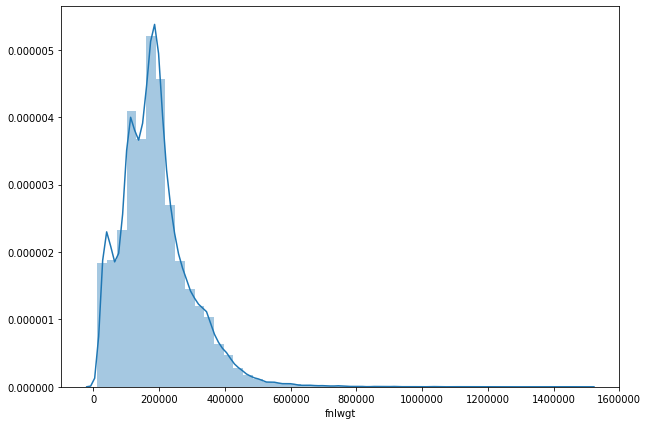

In [4]:
sns.distplot(data.fnlwgt)
plt.show()

In [5]:
data.workclass.unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [39]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))
import pandas_profiling as pp
pp.ProfileReport(data)

In [6]:
data.occupation.unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoder = LabelEncoder()
hot = OneHotEncoder()

In [8]:
data_tr = data.copy(deep=True)
data_tr = data_tr.loc[(data.workclass!='?')&(data.occupation!='?')&(data['native-country']!='?')]
data_tr

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
workclass_tr = encoder.fit_transform(data_tr.workclass)
education_tr = encoder.fit_transform(data_tr.education)
marital_tr = encoder.fit_transform(data_tr['marital-status'])
occupation_tr = encoder.fit_transform(data_tr.occupation)
relation_tr = encoder.fit_transform(data_tr.relationship)
race_tr = encoder.fit_transform(data_tr.race)
gender_tr = encoder.fit_transform(data_tr.gender)
country_tr = encoder.fit_transform(data_tr['native-country'])
income_tr = encoder.fit_transform(data_tr.income)

In [10]:
data_tr.workclass = workclass_tr
data_tr.education = education_tr
data_tr['marital-status'] = marital_tr
data_tr.occupation = occupation_tr
data_tr.relationship = relation_tr
data_tr.race = race_tr
data_tr.gender = gender_tr
data_tr['native-country'] = country_tr
data_tr.income = income_tr

Построим модель логистической регрессии, проверим ее предсказательное качество

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data_tr.drop(['income'], axis=1), data_tr.income, train_size=0.3)
model = LogisticRegression()

In [13]:
model.fit(x_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [14]:
predictions = model.predict_proba(x_test)
pred_res = model.predict(x_test)

График распределения вероятности, что респондент получает менее 50 тысяч

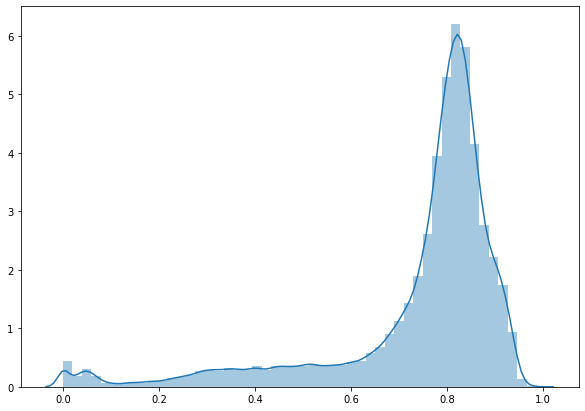

In [16]:
ar = [_[0] for _ in predictions]
sns.distplot(ar)
plt.show()

In [17]:
model.score(x_train, y_train)

0.782765737874097

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_res))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87     23816
           1       0.66      0.30      0.41      7840

    accuracy                           0.79     31656
   macro avg       0.73      0.62      0.64     31656
weighted avg       0.77      0.79      0.76     31656



Точность в 78%, неплохо, с помощью метода опорных векторов построим модель классификации, и проверим насколько  
она будет  лучше\хуже метода лог. регрессии

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [21]:
c_pred = clf.predict(x_test)
clf.score(x_train, y_train)

0.854562877782692

In [22]:
print(classification_report(y_test, c_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     23816
           1       0.75      0.55      0.63      7840

    accuracy                           0.84     31656
   macro avg       0.81      0.74      0.77     31656
weighted avg       0.84      0.84      0.83     31656



Точность увеличилась на 7% !, чтож, попробуем перекодировать вручную значения столбца education по возрастанию, в зависимости  
от уровня образования

In [38]:
data.education.unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [32]:
education_tr = encoder.fit_transform(data.education)

In [56]:
classes = encoder.classes_
sums = data_tr.groupby('education')['income'].sum()
sums

education
0       82
1       89
2       43
3        8
4       22
5       55
6       38
7      398
8      504
9     3178
10     399
11    2416
12    1393
13       1
14     592
15    1990
Name: income, dtype: int32

In [63]:
ed = pd.Series(data=sums.values, index=classes)
ed.sort_values()

Preschool          1
1st-4th            8
5th-6th           22
9th               38
12th              43
7th-8th           55
10th              82
11th              89
Assoc-acdm       398
Doctorate        399
Assoc-voc        504
Prof-school      592
Masters         1393
Some-college    1990
HS-grad         2416
Bachelors       3178
dtype: int32

In [70]:
d = {classes[i]: i for i in range(len(classes))} 

In [84]:
def encoding(row):
    row['education_tr'] = d[row['education']]
    return row

data = data.apply(encoding, axis=1)
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education_tr
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,11
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,7
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,15
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,7
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,11
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,11
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,11


In [87]:
data_tr.education = data.education_tr

In [88]:
x_train, x_test, y_train, y_test = train_test_split(data_tr.drop(['income'], axis=1), data_tr.income, train_size=0.3)
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train, y_train)
c_pred = clf.predict(x_test)


In [89]:
clf.score(x_train, y_train)

0.854046881910659

In [90]:
print(classification_report(y_test, c_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     23852
           1       0.76      0.55      0.63      7804

    accuracy                           0.84     31656
   macro avg       0.81      0.74      0.77     31656
weighted avg       0.84      0.84      0.84     31656



Чтож, увы, точность не увеличилась!